In [1]:
# Import necessory libraries
import rasterio
import os
import glob
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
# specify the path to your main folder containing the subfolders with TIFF images
main_folder_path = 'data/patches/'

# get a list of all TIFF images in the main folder and its subfolders
tif_files = glob.glob(os.path.join(main_folder_path, '**/*.tif'), recursive=True)

# function to extract numbers from a string
def extract_numbers(s):
    return int(''.join(re.findall(r'\d+', s)))

# sort the list in ascending order based on the numbers in the filenames
tif_files.sort(key=extract_numbers)

# create a dictionary to hold your images
images = {}

# load each image into the dictionary
for i in range(0, len(tif_files), 3):  # start at first image, end at last image, step by 3
    tif_file = tif_files[i]
    with rasterio.open(tif_file) as src:
        # get the base name of the file without the extension
        base_name = (os.path.basename(tif_file))
        images[base_name] = src.read()


# now 'images' is a dictionary where the keys are the file names and the values are the loaded images


In [3]:
# print the number of images loaded
print("Number of images loaded: ", len(images))

# print the file paths of the images
for key in images.keys():
    print(key)

Number of images loaded:  1381
S2_3-1-21_18QYF_0.tif
S2_3-1-21_18QYF_1.tif
S2_3-1-21_18QYF_2.tif
S2_3-1-21_18QYF_3.tif
S2_3-1-21_18QYF_4.tif
S2_4-3-18_50LLR_0.tif
S2_4-3-18_50LLR_1.tif
S2_4-3-18_50LLR_2.tif
S2_4-3-18_50LLR_3.tif
S2_4-3-18_50LLR_4.tif
S2_4-3-18_50LLR_5.tif
S2_4-3-18_50LLR_6.tif
S2_4-3-18_50LLR_7.tif
S2_4-3-18_50LLR_8.tif
S2_4-3-18_50LLR_9.tif
S2_4-9-16_16PCC_0.tif
S2_4-9-16_16PCC_1.tif
S2_4-9-16_16PCC_2.tif
S2_4-9-16_16PCC_3.tif
S2_4-9-16_16PCC_4.tif
S2_4-9-16_16PCC_5.tif
S2_4-9-16_16PCC_6.tif
S2_4-9-16_16PCC_7.tif
S2_4-9-16_16PCC_8.tif
S2_4-9-16_16PCC_9.tif
S2_4-9-19_16PCC_0.tif
S2_4-9-19_16PCC_1.tif
S2_4-9-19_16PCC_2.tif
S2_4-9-19_16PCC_3.tif
S2_4-9-19_16PCC_4.tif
S2_4-9-19_16PCC_5.tif
S2_4-9-19_16PCC_6.tif
S2_4-9-19_16PCC_7.tif
S2_4-9-19_16PCC_8.tif
S2_4-9-19_16PCC_9.tif
S2_7-3-20_18QYG_0.tif
S2_7-3-20_18QYG_1.tif
S2_7-3-20_18QYG_2.tif
S2_7-3-20_18QYG_3.tif
S2_7-3-20_18QYG_4.tif
S2_7-3-20_18QYG_5.tif
S2_7-3-20_18QYG_6.tif
S2_7-3-20_18QYG_7.tif
S2_7-3-20_18QYG_8.tif
S

In [4]:
# specify the path to your labels_mapping.txt file
labels_file_path = 'data/labels_mapping.txt'

# load the labels_mapping.txt file
with open(labels_file_path, 'r') as f:
    labels = json.load(f)

# now 'labels' is a dictionary where the keys are the filenames and the values are the lists of labels

# create a dictionary to hold your images with their labels
labeled_images = {}

# load each image into the dictionary with its label
for filename, image in images.items():
    # get the base name of the file without the extension
    base_name = os.path.basename(filename)
    # get the label for this image
    label_list = labels.get(base_name)
    if label_list is None:
        print(f"No label found for image: {base_name}")
    # add the image and its label to the dictionary
    labeled_images[filename] = {'image': image, 'label': label_list}

In [5]:
# print the labels for the loaded images
for filename, image_data in labeled_images.items():
    print(f"Filename: {filename}, Label: {image_data['label']}")


Filename: S2_3-1-21_18QYF_0.tif, Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Filename: S2_3-1-21_18QYF_1.tif, Label: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Filename: S2_3-1-21_18QYF_2.tif, Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Filename: S2_3-1-21_18QYF_3.tif, Label: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Filename: S2_3-1-21_18QYF_4.tif, Label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Filename: S2_4-3-18_50LLR_0.tif, Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Filename: S2_4-3-18_50LLR_1.tif, Label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Filename: S2_4-3-18_50LLR_2.tif, Label: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Filename: S2_4-3-18_50LLR_3.tif, Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Filename: S2_4-3-18_50LLR_4.tif, Label: [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Filename: S2_4-3-18_50LLR_5.tif, Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Filename: S2_4-3-18_50LLR_6.tif, Label: [0, 0, 0, 0, 0

Plot Few random Images

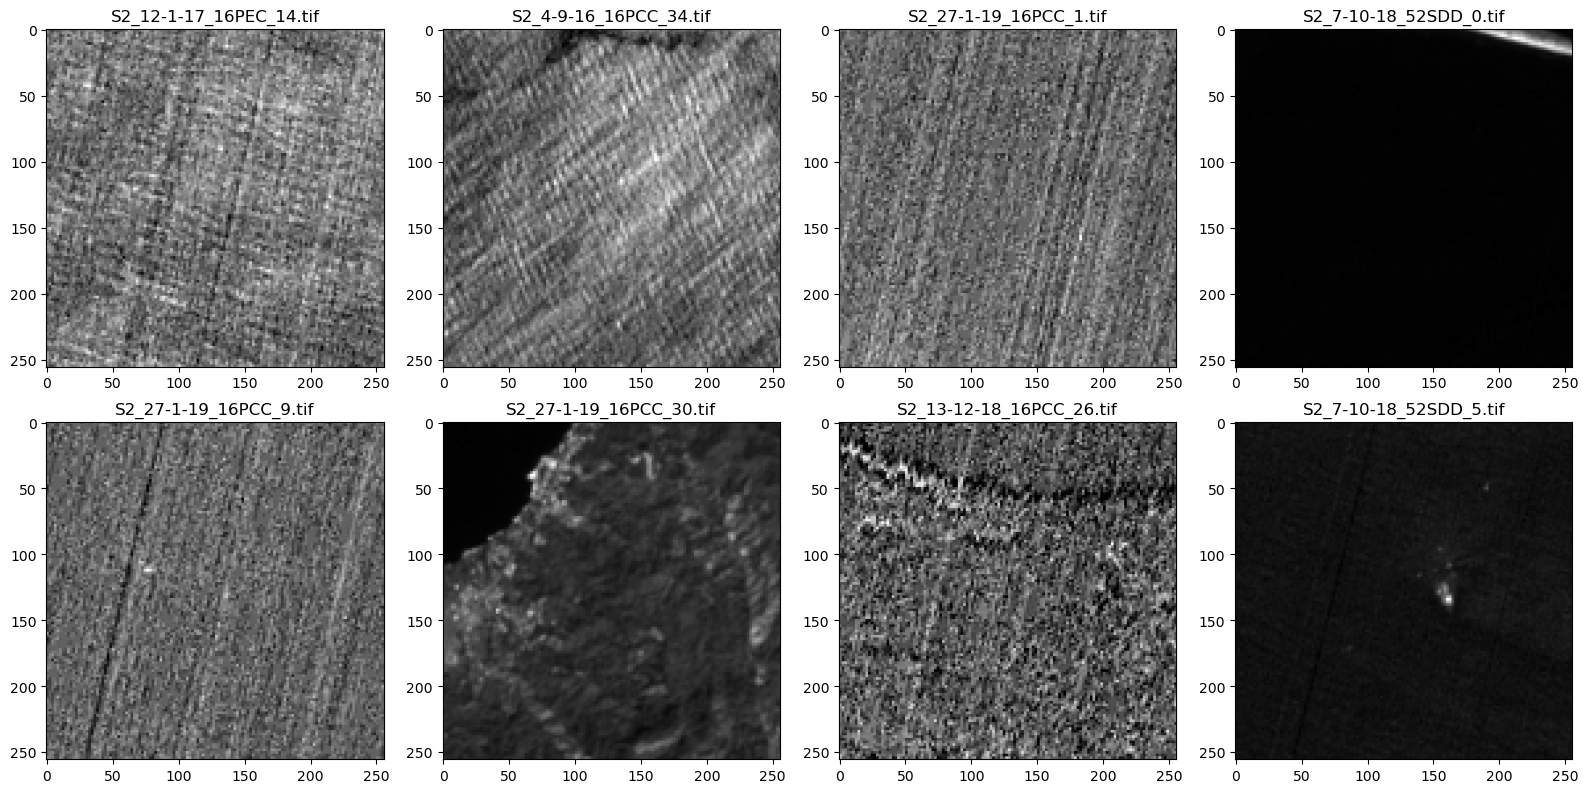

In [6]:
# set the number of rows and columns for your subplot grid
cols = 4
rows = 2

# create a new figure with larger size
fig = plt.figure(figsize=(cols * 4, rows * 4))

# select a random sample of 8 images
random_images = random.sample(list(images.items()), 8)

# iterate over the random images
for i, (image_key, image_data) in enumerate(random_images):
    # convert the image data to a numpy array
    image_array = np.array(image_data)

    # if the image has multiple bands, select the first one
    if image_array.ndim > 2:
        image_array = image_array[10, :, :]

    # extract the image name from the path
    image_name = os.path.basename(image_key)

    # add a subplot for the current image
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(image_array, cmap='gray')
    ax.set_title('{}'.format(image_name))

# display the plot
plt.tight_layout()
plt.show()


Histogram method to visualise the data

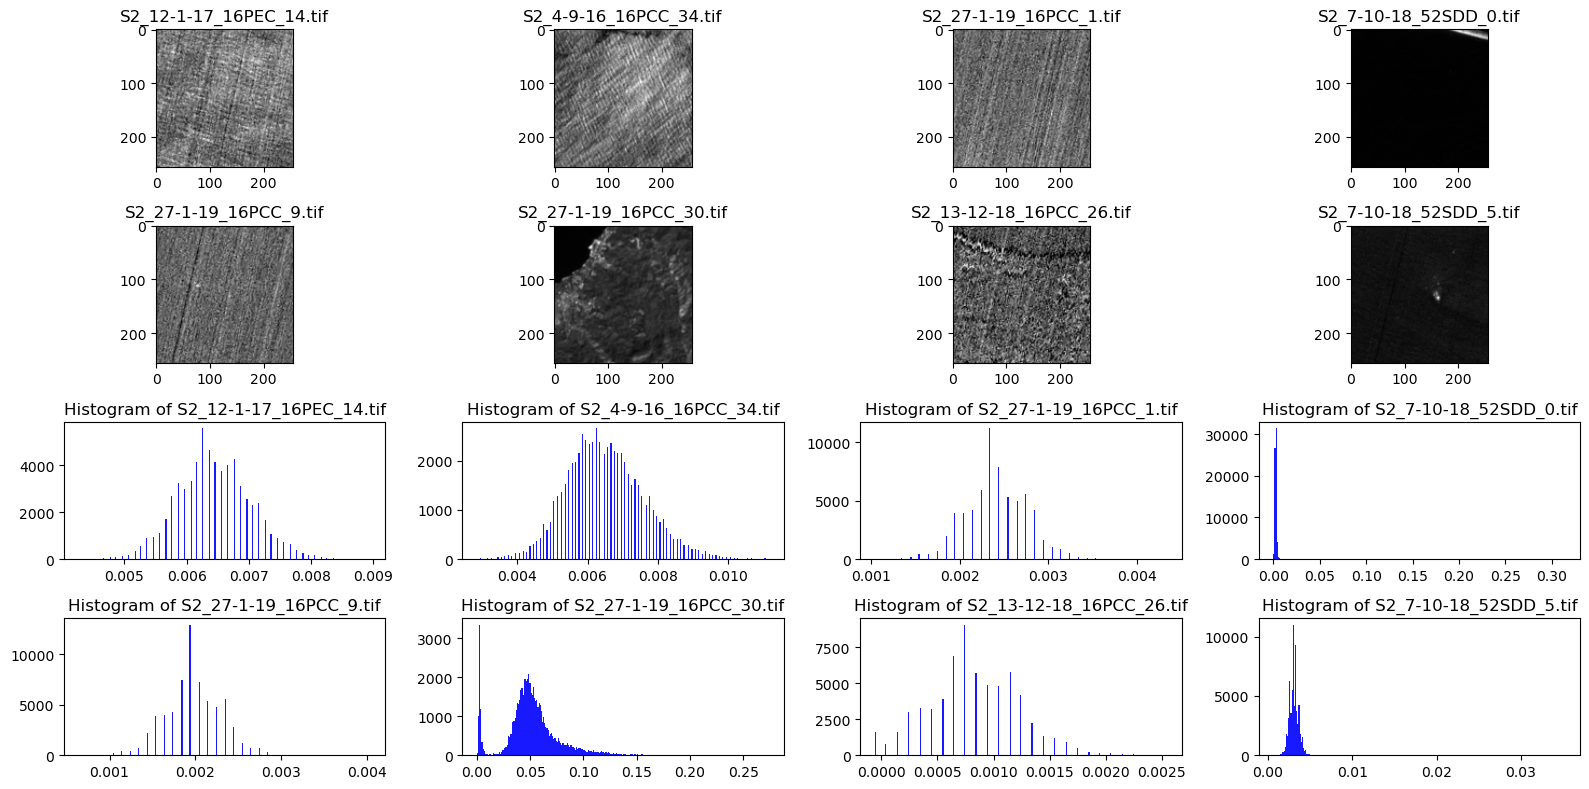

In [7]:
# set the number of rows and columns for your subplot grid
cols = 4
rows = 2

# create a new figure with larger size
fig, axs = plt.subplots(rows * 2, cols, figsize=(cols * 4, rows * 4))

# select a random sample of 8 images
# random_images = random.sample(list(images.items()), 8)

# iterate over the random images
for i, (image_key, image_data) in enumerate(random_images):
    # convert the image data to a numpy array
    image_array = np.array(image_data)

    # if the image has multiple bands, select the first one
    if image_array.ndim > 2:
        image_array = image_array[10, :, :]

    # extract the image name from the path
    image_name = os.path.basename(image_key)

    # add a subplot for the current image
    ax = axs[i//cols, i%cols]
    ax.imshow(image_array, cmap='gray')
    ax.set_title('{}'.format(image_name))

    # create a histogram for the current image
    ax_hist = axs[i//cols + rows, i%cols]
    ax_hist.hist(image_array.ravel(), bins=256, color='blue', alpha=0.9)
    ax_hist.set_title('Histogram of {}'.format(image_name))

# display the plot
plt.tight_layout()
plt.show()


The X-axis represents the pixel intensity values. Since the images are grayscale, the pixel intensity values range from 0 (black) to 255 (white), here images are normalized so the pixel intensity values are usually in the range of 0 to 1.
The Y-axis represents the frequency of each pixel intensity value. This means the number of times each pixel intensity value appears in the image.

------------------------------------------------------------------------------------------------------------------------------------------------------------

Image Statistics for All Images

Compute and plot the mean and standard deviation of pixel values for all images. This can give a sense of the overall brightness and contrast across your image dataset.

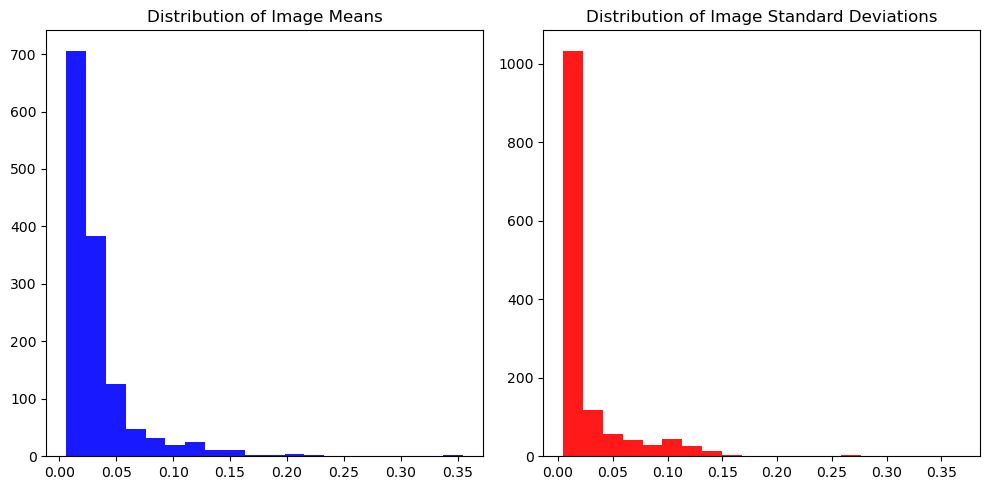

In [8]:
# Compute image statistics
image_means = [np.mean(np.array(image_data)) for image_key, image_data in images.items()]
image_stds = [np.std(np.array(image_data)) for image_key, image_data in images.items()]

# Plot image statistics
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(image_means, bins=20, color='blue', alpha=0.9)
plt.title('Distribution of Image Means')

plt.subplot(1, 2, 2)
plt.hist(image_stds, bins=20, color='red', alpha=0.9)
plt.title('Distribution of Image Standard Deviations')

plt.tight_layout()
plt.show()

Pixel Value Distributions for All Images: Plot the pixel value distributions for all images together in one histogram. This can give a sense of the overall distribution of pixel values across image dataset.

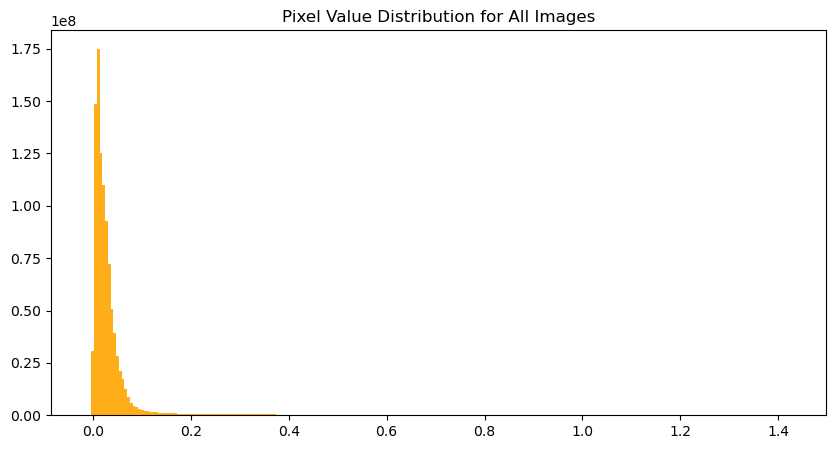

In [9]:
# Flatten all image data into one list
all_pixels = [np.array(image_data).ravel() for image_key, image_data in images.items()]
all_pixels = np.concatenate(all_pixels)

# Plot pixel value distribution
plt.figure(figsize=(10, 5))
plt.hist(all_pixels, bins=256, color='orange', alpha=0.9)
plt.title('Pixel Value Distribution for All Images')
plt.show()

Classification Task

In [10]:
# Create a dictionary to map class indices to names
class_names = {
    1: 'Marine Debris',
    2: 'Dense Sargassum',
    3: 'Sparse Sargassum',
    4: 'Natural Organic Material',
    5: 'Ship',
    6: 'Clouds',
    7: 'Marine Water',
    8: 'Sediment-Laden Water',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves',
    13: 'Cloud Shadows',
    14: 'Wakes',
    15: 'Mixed Water'
}

# Print out the class labels for each image
for filename, data in labeled_images.items():
    # Get the class indices for this image
    class_indices = data['label']
    # Map the class indices to names
    class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
    print(f"Image: {os.path.basename(filename)}, Classes: {class_names_for_image}")


Image: S2_3-1-21_18QYF_0.tif, Classes: ['Marine Debris', 'Marine Water', 'Mixed Water']
Image: S2_3-1-21_18QYF_1.tif, Classes: ['Marine Debris', 'Natural Organic Material', 'Marine Water', 'Mixed Water']
Image: S2_3-1-21_18QYF_2.tif, Classes: ['Marine Debris', 'Marine Water', 'Mixed Water']
Image: S2_3-1-21_18QYF_3.tif, Classes: ['Marine Water']
Image: S2_3-1-21_18QYF_4.tif, Classes: ['Shallow Water']
Image: S2_4-3-18_50LLR_0.tif, Classes: ['Marine Debris', 'Marine Water']
Image: S2_4-3-18_50LLR_1.tif, Classes: ['Shallow Water']
Image: S2_4-3-18_50LLR_2.tif, Classes: ['Marine Debris', 'Natural Organic Material', 'Marine Water']
Image: S2_4-3-18_50LLR_3.tif, Classes: ['Marine Debris', 'Marine Water']
Image: S2_4-3-18_50LLR_4.tif, Classes: ['Marine Debris', 'Marine Water', 'Foam']
Image: S2_4-3-18_50LLR_5.tif, Classes: ['Marine Debris', 'Marine Water', 'Mixed Water']
Image: S2_4-3-18_50LLR_6.tif, Classes: ['Marine Water']
Image: S2_4-3-18_50LLR_7.tif, Classes: ['Marine Debris', 'Natural 

In [11]:
# Create a dictionary to hold the counts for each class
class_counts = {class_name: 0 for class_name in class_names.values()}

# Iterate over all labeled images and count the classes
for filename, data in labeled_images.items():
    # Get the class indices for this image
    class_indices = data['label']
    # Map the class indices to names
    class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
    # Increment the count for each class
    for class_name in class_names_for_image:
        class_counts[class_name] += 1

# Print out the counts for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")


Class: Marine Debris, Number of Images: 373
Class: Dense Sargassum, Number of Images: 49
Class: Sparse Sargassum, Number of Images: 106
Class: Natural Organic Material, Number of Images: 71
Class: Ship, Number of Images: 182
Class: Clouds, Number of Images: 181
Class: Marine Water, Number of Images: 870
Class: Sediment-Laden Water, Number of Images: 51
Class: Foam, Number of Images: 59
Class: Turbid Water, Number of Images: 220
Class: Shallow Water, Number of Images: 64
Class: Waves, Number of Images: 54
Class: Cloud Shadows, Number of Images: 71
Class: Wakes, Number of Images: 106
Class: Mixed Water, Number of Images: 140


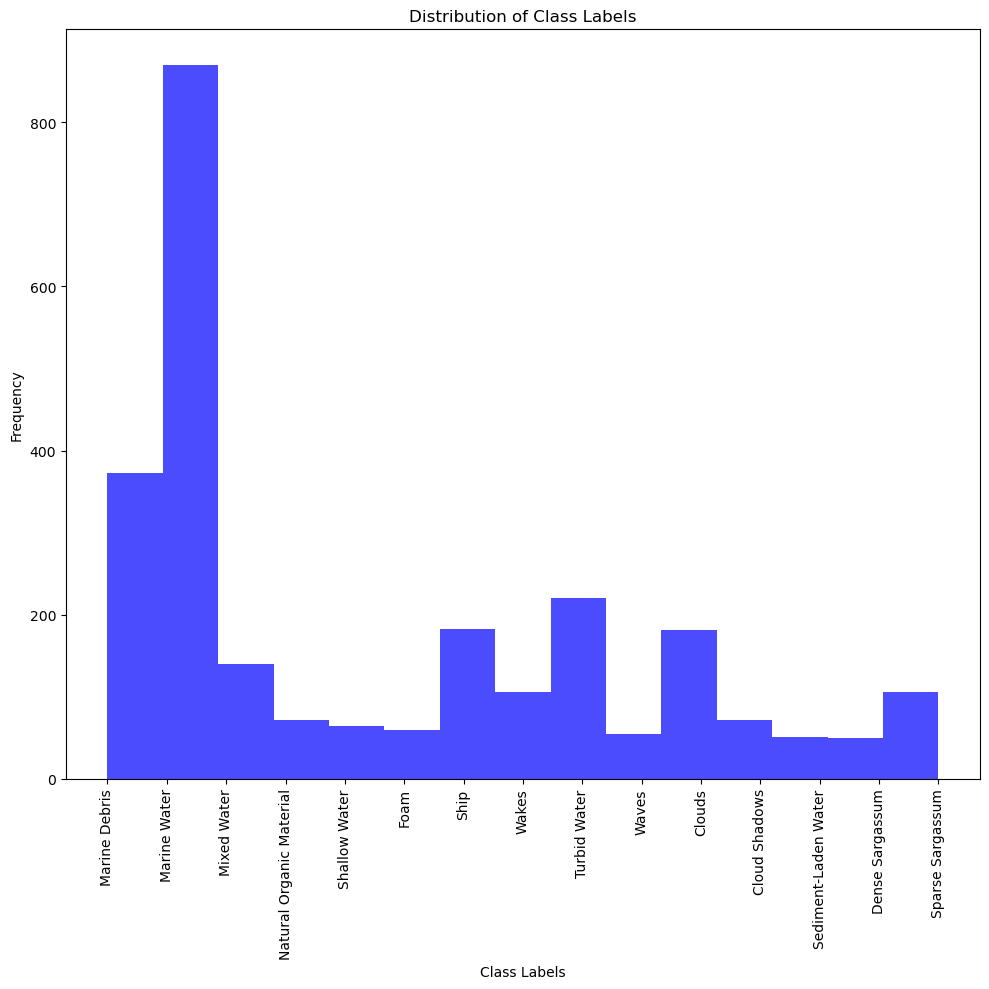

In [12]:
# Create a list to hold all class labels
all_labels = []

# Iterate over all labeled images and add their labels to the list
for filename, data in labeled_images.items():
    # Get the class indices for this image
    class_indices = data['label']
    # Map the class indices to names
    class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
    all_labels.extend(class_names_for_image)

# Create a histogram of class labels
plt.figure(figsize=(10, 10))
plt.hist(all_labels, bins=len(class_names), color='blue', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Distribution of Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


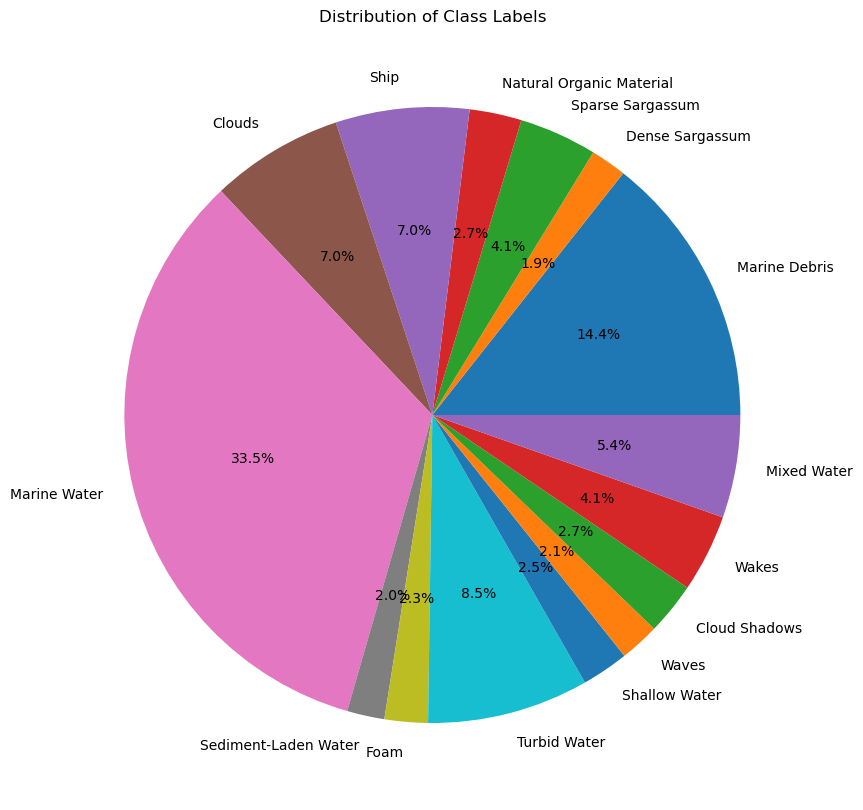

In [13]:
# Create a dictionary to hold the counts for each class
class_counts = {class_name: 0 for class_name in class_names.values()}

# Iterate over all labeled images and count the classes
for filename, data in labeled_images.items():
    # Get the class indices for this image
    class_indices = data['label']
    # Map the class indices to names
    class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
    # Increment the count for each class
    for class_name in class_names_for_image:
        class_counts[class_name] += 1

# Plot a pie chart of class distributions
plt.figure(figsize=(10, 10))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Class Labels')
plt.show()


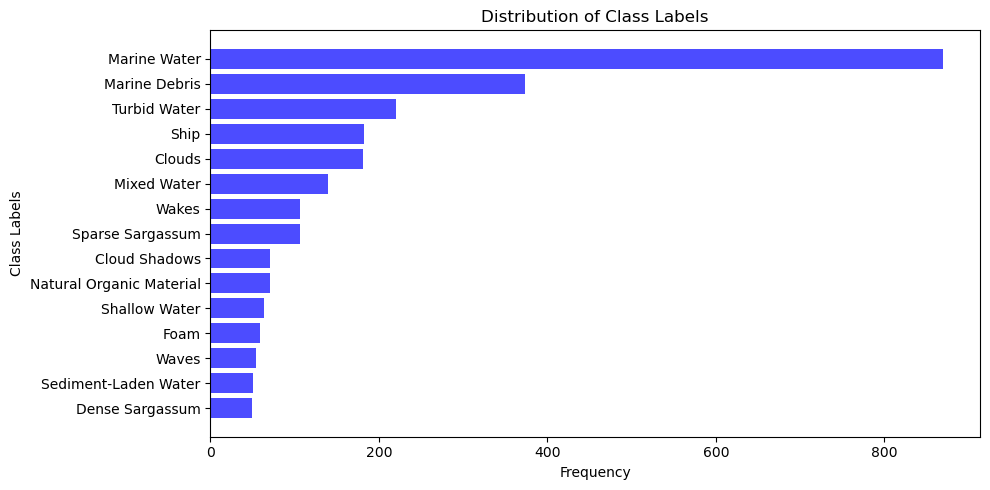

In [14]:
# Create a dictionary to hold the counts for each class
class_counts = {class_name: 0 for class_name in class_names.values()}

# Iterate over all labeled images and count the classes
for filename, data in labeled_images.items():
    # Get the class indices for this image
    class_indices = data['label']
    # Map the class indices to names
    class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
    # Increment the count for each class
    for class_name in class_names_for_image:
        class_counts[class_name] += 1

# Sort the classes by counts
sorted_classes = sorted(class_counts.items(), key=lambda item: item[1])

# Plot a stacked bar chart of class distributions
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_classes)), [count for class_name, count in sorted_classes], color='blue', alpha=0.7)
plt.yticks(range(len(sorted_classes)), [class_name for class_name, count in sorted_classes])
plt.title('Distribution of Class Labels')
plt.xlabel('Frequency')
plt.ylabel('Class Labels')
plt.tight_layout()
plt.show()


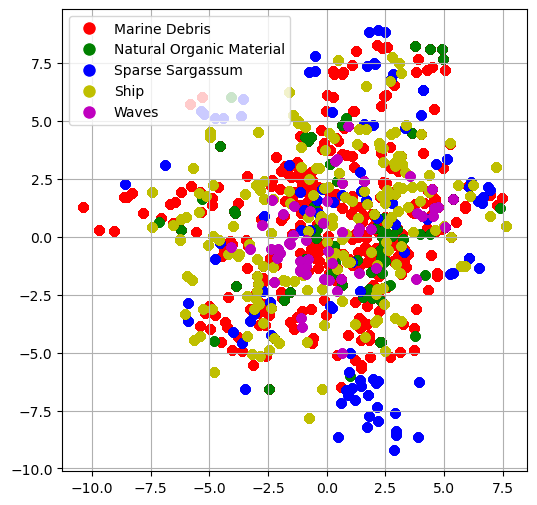

In [15]:
# Define a generator function to process images in chunks
def process_images(labeled_images, chunk_size=100):
    for i in range(0, len(labeled_images), chunk_size):
        data = []
        labels = []
        chunk = list(labeled_images.items())[i:i+chunk_size]
        for filename, content in chunk:
            flattened_image = content['image'].flatten()
            data.append(flattened_image)
            # Get the class indices for this image
            class_indices = content['label']
            # Map the class indices to names
            class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
            labels.append(class_names_for_image)
        
        # Create a numpy array from the data
        data = np.array(data)
        
        # Create an imputer instance
        imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
        
        # Perform imputation on the data
        data = imputer.fit_transform(data)
        
        yield data, labels

# Assuming 'labels' is the list with your classes
classes = ['Marine Debris', 'Natural Organic Material', 'Sparse Sargassum', 'Ship', 'Waves']
colors = ['r', 'g', 'b', 'y', 'm']  # Colors for the classes

# Initialize an empty DataFrame for visualization
vis_df = pd.DataFrame(columns=['Component 1', 'Component 2', 'Label'])

# Perform t-SNE on each chunk of data
for data, labels in process_images(labeled_images):
    tsne = TSNE(n_components=2, random_state=42, perplexity=28, n_jobs=-1)
    components = tsne.fit_transform(data)
    chunk_df = pd.DataFrame(data=components, columns=['Component 1', 'Component 2'])
    chunk_df['Label'] = labels
    vis_df = pd.concat([vis_df, chunk_df])

# Plot
plt.figure(figsize=(6, 6))
for i, class_ in enumerate(classes):
    # For each class, mark the images that belong to that class
    for labels in vis_df['Label']:
        if class_ in labels:
            plt.scatter(vis_df[vis_df['Label'].apply(lambda x: class_ in x)]['Component 1'], 
                        vis_df[vis_df['Label'].apply(lambda x: class_ in x)]['Component 2'], 
                        color=colors[i])

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_,
                              markerfacecolor=color, markersize=10) for class_, color in zip(classes, colors)]
plt.legend(handles=legend_elements, loc='best')

plt.grid(True)
plt.show()


Algorithm design using Spiral approach

In [16]:
# Load dataset and preprocess the data
train_X_file = "data/splits/train_X.txt"
test_X_file = "data/splits/test_X.txt"
val_X_file = "data/splits/val_X.txt"

# Read the file names from the text files
with open(train_X_file, 'r') as file:
    train_X = ["S2_" + line.strip() + ".tif" for line in file]

with open(test_X_file, 'r') as file:
    test_X = ["S2_" + line.strip() + ".tif" for line in file]

with open(val_X_file, 'r') as file:
    val_X = ["S2_" + line.strip() + ".tif" for line in file]

# Now, train_X, test_X, and val_X are lists of file names
# You can access the corresponding images from the 'images' dictionary
X_train = {name: images[name] for name in train_X if name in images}
X_test = {name: images[name] for name in test_X if name in images}
X_val = {name: images[name] for name in val_X if name in images}

# Print the number of images in each set
print(f"Number of training images: {len(X_train)}")
print(f"Number of testing images: {len(X_test)}")
print(f"Number of validation images: {len(X_val)}")


Number of training images: 694
Number of testing images: 359
Number of validation images: 328


In [17]:
# Load the labels mapping from the file
with open('data/labels_mapping.txt', 'r') as f:
    labels_mapping = json.load(f)

# Load the train, test, and validation sets
with open('data/splits/train_X.txt', 'r') as f:
    train_X = f.read().splitlines()
with open('data/splits/test_X.txt', 'r') as f:
    test_X = f.read().splitlines()
with open('data/splits/val_X.txt', 'r') as f:
    val_X = f.read().splitlines()

# Initialize the train, test, and validation labels
y_train = []
y_test = []
y_val = []

# Generate the train labels
for name in train_X:
    # Add the corresponding label to the train labels
    y_train.append(labels_mapping[f'S2_{name}.tif'])

# Generate the test labels
for name in test_X:
    # Add the corresponding label to the test labels
    y_test.append(labels_mapping[f'S2_{name}.tif'])

# Generate the validation labels
for name in val_X:
    # Add the corresponding label to the validation labels
    y_val.append(labels_mapping[f'S2_{name}.tif'])

# Print the train, test, and validation labels
print(f'train_y: {len(y_train)}')
print(f'test_y: {len(y_test)}')
print(f'val_y: {len(y_val)}')



train_y: 694
test_y: 359
val_y: 328


1. Random Forest Regression Algorithm

In [18]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=20,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_impurity_decrease=0,
                             oob_score=True,
                             class_weight='balanced_subsample',
                             random_state=42,
                             n_jobs=-1)

# Flatten the images for the random forest
X_train_flattened = [image.flatten() for image in X_train.values()]
X_test_flattened = [image.flatten() for image in X_test.values()]

# Check if there are any NaN values in the training data
if np.isnan(X_train_flattened).any():
    # print("NaN values found in the training data. Replacing them with 0.")
    X_train_flattened = np.nan_to_num(X_train_flattened)

# Check if there are any NaN values in the testing data
if np.isnan(X_test_flattened).any():
    # print("NaN values found in the testing data. Replacing them with 0.")
    X_test_flattened = np.nan_to_num(X_test_flattened)

# Fit the model on the training data
clf.fit(X_train_flattened, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test_flattened)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"The accuracy of the random forest model is {accuracy * 100}%.")


The accuracy of the random forest model is 20.334261838440113%.


2. Stochastic Gradient Descent Algorithm

In [19]:
# Convert one-hot encoded labels back to categorical labels
y_train_categorical = np.argmax(y_train, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)
y_val_categorical = np.argmax(y_val, axis=1)

# Now, y_train_categorical, y_test_categorical, and y_val_categorical are 1D arrays with categorical labels.

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)

# Fit the model on the training data in chunks
chunk_size = 100
num_chunks = len(X_train_flattened) // chunk_size
for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    clf.partial_fit(X_train_flattened[start:end], y_train_categorical[start:end], classes=np.unique(y_train_categorical))

# If there are any remaining samples, fit them as well
if len(X_train_flattened) % chunk_size != 0:
    clf.partial_fit(X_train_flattened[num_chunks*chunk_size:], y_train_categorical[num_chunks*chunk_size:])

# Predict the labels for the test data
y_pred = clf.predict(X_test_flattened)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_categorical, y_pred)

# Print the accuracy
print(f"The accuracy of the SGD model is {accuracy * 100}%.")


The accuracy of the SGD model is 25.069637883008355%.


3. Convolutional Neural Network algorithm with spiral approach

In [20]:
# Reshape the data to include the channel dimension
X_train_reshaped = np.array(X_train_flattened).reshape(-1, 256, 256, 11)
X_test_reshaped = np.array(X_test_flattened).reshape(-1, 256, 256, 11)


In [21]:
# Define a generator to load the data in chunks
def data_generator(X, y, batch_size):
    num_samples = len(X)
    num_batches = num_samples // batch_size
    while True:
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            X_batch = np.array(X[start_idx:end_idx]).reshape(-1, 256, 256, 11)
            y_batch = y[start_idx:end_idx]
            yield X_batch, y_batch

In [22]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 11)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_categorical)), activation='softmax')
])

In [23]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # Use the first GPU

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define batch size
batch_size = 32

# Create data generators for training and testing data
train_generator = data_generator(X_train_flattened, y_train_categorical, batch_size)
test_generator = data_generator(X_test_flattened, y_test_categorical, batch_size)

# Fit the model on the training data
with tf.device('/GPU:0'):  # Use the first GPU
    history = model.fit(train_generator, epochs=10, steps_per_epoch=len(X_train_flattened)//batch_size)


Epoch 1/10


21/21 [==============================] - 112s 5s/step - loss: 2.4426 - accuracy: 0.2604
Epoch 2/10
21/21 [==============================] - 84s 4s/step - loss: 2.1447 - accuracy: 0.3095
Epoch 3/10
21/21 [==============================] - 88s 4s/step - loss: 1.9293 - accuracy: 0.3095
Epoch 4/10
21/21 [==============================] - 86s 4s/step - loss: 1.8504 - accuracy: 0.3289
Epoch 5/10
21/21 [==============================] - 114s 6s/step - loss: 1.7230 - accuracy: 0.4018
Epoch 6/10
21/21 [==============================] - 152s 7s/step - loss: 1.7040 - accuracy: 0.3720
Epoch 7/10
21/21 [==============================] - 104s 5s/step - loss: 1.5733 - accuracy: 0.4732
Epoch 8/10
21/21 [==============================] - 90s 4s/step - loss: 1.5023 - accuracy: 0.4658
Epoch 9/10
21/21 [==============================] - 87s 4s/step - loss: 1.3959 - accuracy: 0.5089
Epoch 10/10
21/21 [==============================] - 82s 4s/step - loss: 1.3011 - accuracy: 0.5506


In [24]:
# Evaluate the model on the test data
with tf.device('/GPU:0'):  # Use the first GPU
    loss, accuracy = model.evaluate(test_generator, steps=len(X_test_flattened)//batch_size)


11/11 [==============================] - 20s 2s/step - loss: 2.7579 - accuracy: 0.3494
